In [1]:
import re

locations = ["daylight", "indoor-daylight", "indoor-dark"]
ESP32 = {}
current_key = None

for filename in locations:

    full_path = "ESP32/" + filename + ".txt"
    with open(full_path, "r") as file:
        ESP32[filename] = {}
        
        for line in file:
            if line.strip() == '':
                continue
            # Check if the line matches the regex pattern (any number followed by "cm" with a space)
            elif re.search(r'\d+\scm', line):
                ESP32[filename][line.strip().split(' ')[0]] = []
                current_key = line.strip().split(' ')[0]
                
            elif current_key != None:
                ESP32[filename][current_key].append(int(line.strip()))
                
            else:
                print(line)
                print("No key!")

for key in ESP32.keys():
    print(key)
    print(ESP32[key].keys())
    print()

daylight
dict_keys(['5', '10', '20', '30', '40', '50', '60'])

indoor-daylight
dict_keys(['5', '10', '20', '40', '60', '80', '100', '120', '140', '160', '180'])

indoor-dark
dict_keys(['5', '10', '20', '40', '60', '80', '100', '120', '140', '160', '180', '200', '220', '240', '260', '280', '300', '320'])



In [2]:
import statistics

ESP32_averages = {}

for location in locations:
    ESP32_averages[location] = {}
    
    for distance in ESP32[location].keys():
        mean = statistics.mean(ESP32[location][distance]) / 10
        ESP32_averages[location][distance] = round(mean, 1)

for key in ESP32_averages.keys():
    print(key)
    print(ESP32_averages[key].items())
    print()

daylight
dict_items([('5', 3.5), ('10', 7.9), ('20', 16.4), ('30', 26.5), ('40', 34.9), ('50', 48.6), ('60', 60.3)])

indoor-daylight
dict_items([('5', 3.7), ('10', 8.3), ('20', 18.2), ('40', 38.9), ('60', 59.1), ('80', 78.5), ('100', 97.0), ('120', 117.1), ('140', 138.7), ('160', 156.3), ('180', 173.3)])

indoor-dark
dict_items([('5', 2.8), ('10', 7.6), ('20', 17.4), ('40', 36.0), ('60', 56.4), ('80', 76.4), ('100', 95.6), ('120', 115.6), ('140', 136.6), ('160', 156.0), ('180', 176.5), ('200', 196.5), ('220', 215.5), ('240', 236.4), ('260', 257.3), ('280', 275.7), ('300', 295.1), ('320', 314.8)])



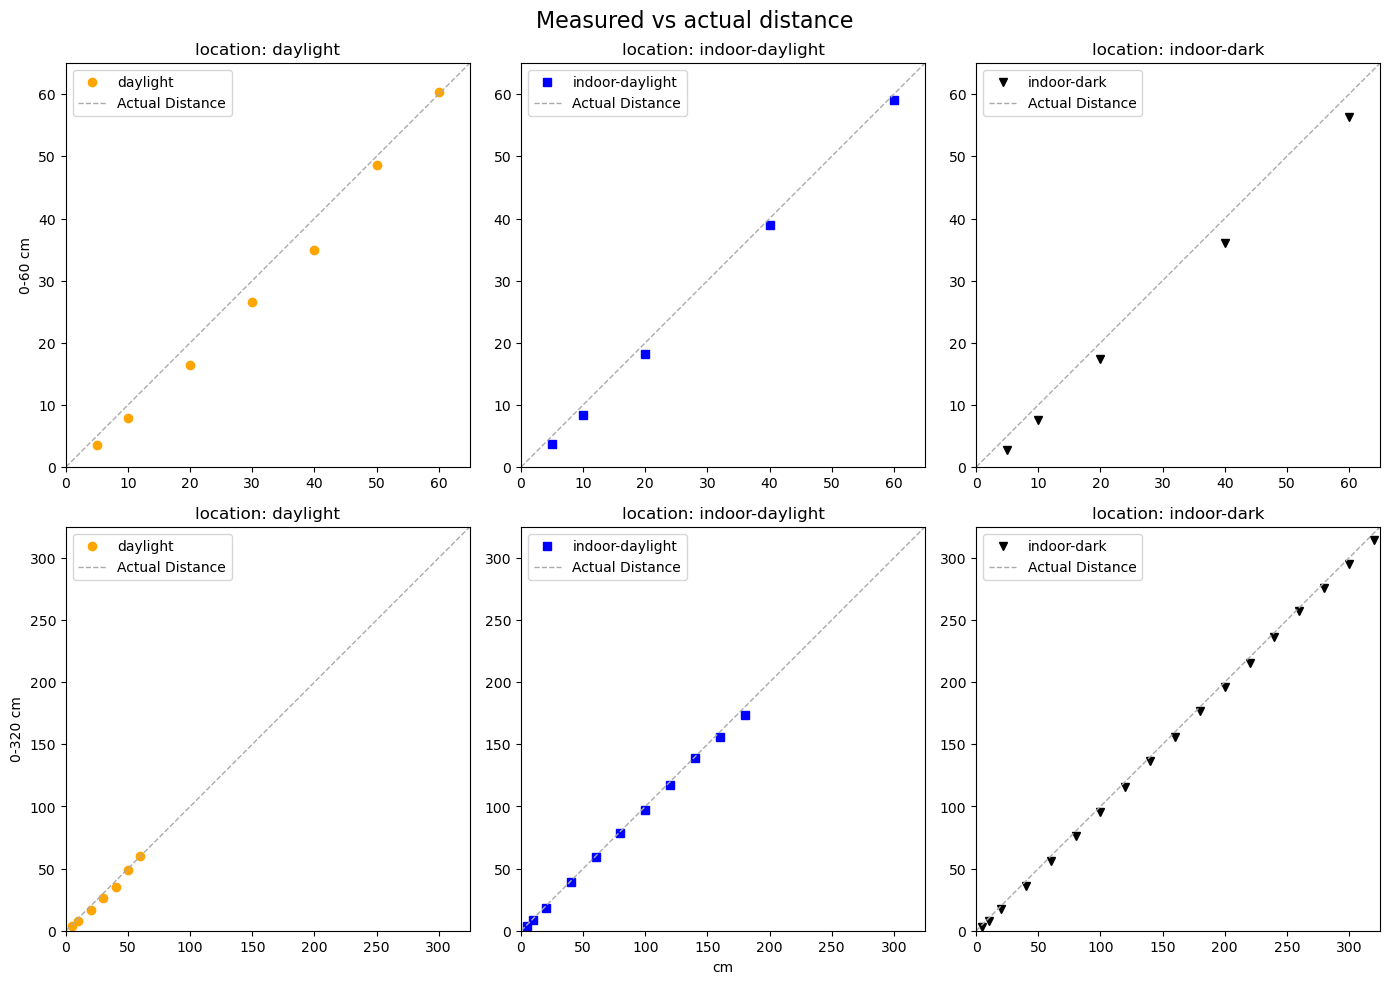

In [14]:
import matplotlib.pyplot as plt
import itertools

markers = itertools.cycle(('o', 's', 'v'))
colors = itertools.cycle(("orange", "blue", "black"))

# Function to convert distance strings to numerical values
def extract_distance(dist_str):
    return int(dist_str.split()[0])

distances = sorted(next(iter(ESP32.values())).keys())

fig, axs = plt.subplots(2, 3, figsize=(14, 10), subplot_kw={'aspect': 'equal'})

# Plot data for each location
for index, (location, measurements) in enumerate(ESP32_averages.items()):
    distances = list(extract_distance(dist) for dist in measurements.keys()) # x-values
    measured_values = list(measurements.values()) # y-values
    marker = next(markers)
    color = next(colors)
    axs[0, index].plot(distances, measured_values, marker, color=color, label=location)
    axs[1, index].plot(distances, measured_values, marker, color=color, label=location)

    # Plot actual distances as a reference line
    axs[0, index].plot([0, 500], [0, 500],  linestyle='--', color='#aaa', linewidth=1, label='Actual Distance')
    axs[1, index].plot([0, 500], [0, 500],  linestyle='--', color='#aaa', linewidth=1, label='Actual Distance')
    
    axs[0, index].axis([0, 65, 0, 65])
    axs[1, index].axis([0, 325, 0, 325])

    # Add labels and title
    axs[0, index].set_title("location: " + location)
    axs[1, index].set_title("location: " + location)
    axs[0, index].legend()
    axs[1, index].legend()

    axs[1, 1].set_xlabel('cm')
    axs[0, 0].set_ylabel('0-60 cm')
    axs[1, 0].set_ylabel('0-320 cm')

# Set the main title
fig.suptitle('Measured vs actual distance', fontsize=16)

# Display the plot
plt.tight_layout()
plt.show()

In [4]:
distance_modes = ["short", "medium", "long"]
STM32H7 = {}
current_key = None

for filename in distance_modes:

    full_path = "STM32H7/" + filename + ".txt"
    with open(full_path, "r") as file:
        STM32H7[filename] = {}
        
        for line in file:
            if line.strip() == '':
                continue
            # Check if the line matches the regex pattern (any number followed by "cm" with a space)
            elif re.search(r'\d+\s?cm', line):
                STM32H7[filename][line.strip().split(" ")[0]] = []
                current_key = line.strip().split(" ")[0]
                
            elif current_key != None:
                STM32H7[filename][current_key].append(int(line.strip()))
                
            else:
                print("No key!")

for key in ESP32.keys():
    print(key)
    print(ESP32[key].keys())
    print()

daylight
dict_keys(['5', '10', '20', '30', '40', '50', '60'])

indoor-daylight
dict_keys(['5', '10', '20', '40', '60', '80', '100', '120', '140', '160', '180'])

indoor-dark
dict_keys(['5', '10', '20', '40', '60', '80', '100', '120', '140', '160', '180', '200', '220', '240', '260', '280', '300', '320'])



In [5]:
STM32H7_averages = {}

for distance_mode in distance_modes:
    STM32H7_averages[distance_mode] = {}
    
    for distance in STM32H7[distance_mode].keys():
        mean = statistics.mean(STM32H7[distance_mode][distance]) / 10
        STM32H7_averages[distance_mode][distance] = round(mean, 1)

for key in STM32H7_averages.keys():
    print(key)
    print(STM32H7_averages[key].items())
    print()

short
dict_items([('5', 7.0), ('10', 9.8), ('20', 17.1), ('40', 38.6), ('80', 78.3), ('120', 114.9), ('160', 143.1), ('200', 140.3), ('240', 82.4)])

medium
dict_items([('5', 7.0), ('10', 9.9), ('20', 17.0), ('40', 39.6), ('80', 81.4), ('120', 119.6), ('160', 156.9), ('200', 189.0), ('240', 202.4)])

long
dict_items([('5', 7.0), ('10', 10.0), ('20', 17.1), ('40', 41.9), ('80', 90.5), ('120', 133.7), ('160', 172.2), ('200', 202.0), ('240', 226.6)])



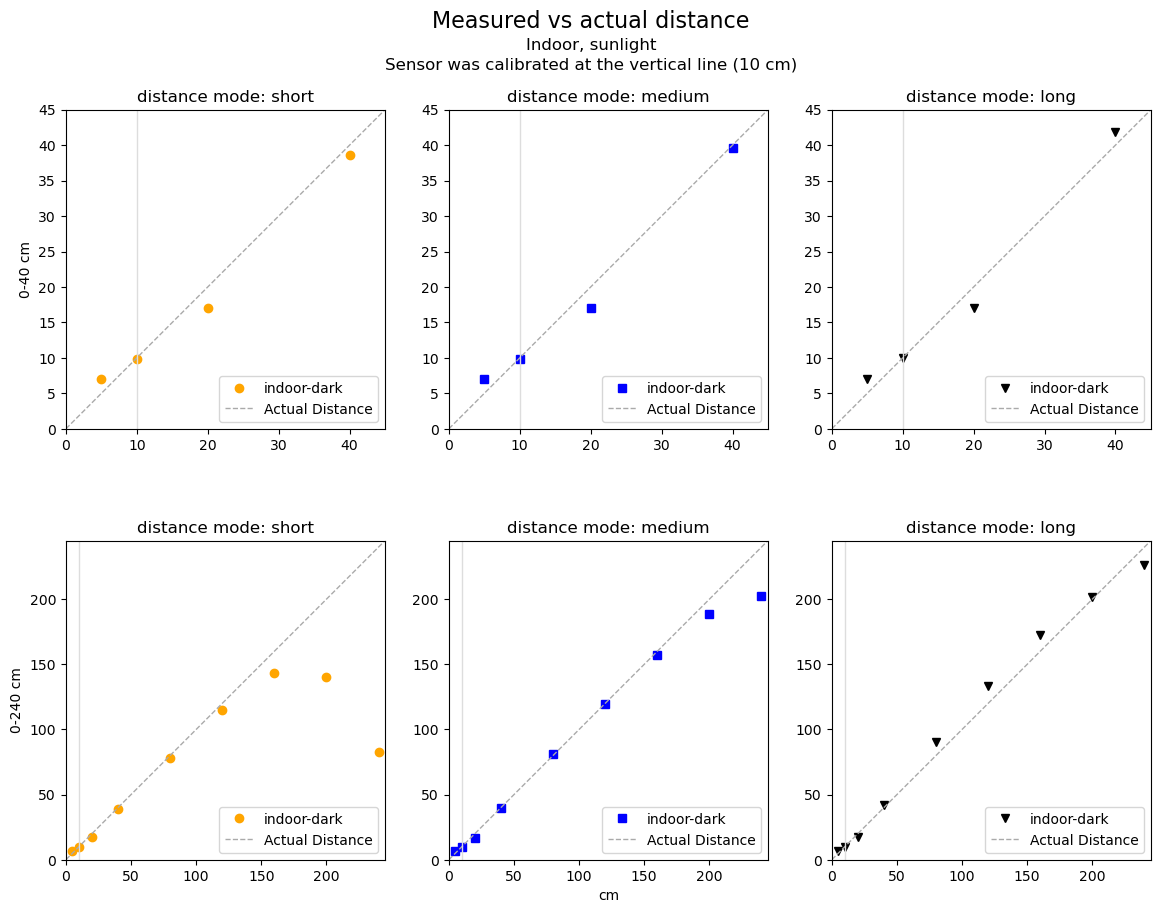

In [15]:
distances = sorted(next(iter(STM32H7.values())).keys())

fig, axs = plt.subplots(2, 3, figsize=(14, 10), subplot_kw={'aspect': 'equal'}, gridspec_kw={'top': 0.9})

# Plot data for each distance mode
for index, (distance_mode, measurements) in enumerate(STM32H7_averages.items()):
    distances = list(extract_distance(dist) for dist in measurements.keys()) # x-values
    measured_values = list(measurements.values()) # y-values
    marker = next(markers)
    color = next(colors)
    axs[0, index].plot(distances, measured_values, marker, color=color, label=location)
    axs[1, index].plot(distances, measured_values, marker, color=color, label=location)

    # Plot actual distances as a reference line
    axs[0, index].plot([0, 500], [0, 500],  linestyle='--', color='#aaa', linewidth=1, label='Actual Distance')
    axs[1, index].plot([0, 500], [0, 500],  linestyle='--', color='#aaa', linewidth=1, label='Actual Distance')

    # Draw vertical line at x = 10, where the sensor was calibrated
    axs[0, index].axvline(x=10, color='#ddd', linestyle='-', linewidth=1)
    axs[1, index].axvline(x=10, color='#ddd', linestyle='-', linewidth=1)
    
    axs[0, index].axis([0, 45, 0, 45])
    axs[1, index].axis([0, 245, 0, 245])

    axs[1, 1].set_xlabel('cm')
    axs[0, 0].set_ylabel('0-40 cm')
    axs[1, 0].set_ylabel('0-240 cm')

    # Add labels and title
    axs[0, index].set_title("distance mode: " + distance_mode)
    axs[1, index].set_title("distance mode: " + distance_mode)
    axs[0, index].legend()
    axs[1, index].legend()

# Set the main title
fig.suptitle('Measured vs actual distance',fontsize=16)

fig.text(0.5, 0.94, 'Indoor, sunlight', ha='center', fontsize=12)
fig.text(0.5, 0.92, 'Sensor was calibrated at the vertical line (10 cm)', ha='center', fontsize=12)
    
# Display the plot
plt.show()